# PyPIPR Package Examples

This directory contains specialized examples demonstrating different aspects of the PyPIPR package:

## Available Examples:

### 📊 [example_measurement.ipynb](./example_measurement.ipynb)
**Individual Pupil Measurement Analysis**
- Single trial analysis and fitting
- Baseline correction techniques
- Comprehensive phase fitting with PupilFit
- Preprocessing pipeline demonstration
- Method comparison (comprehensive vs traditional vs custom)
- Perfect for detailed single-response analysis

### 📈 [example_series.ipynb](./example_series.ipynb) 
**Pupil Series Analysis Pipeline**
- Continuous recording analysis with multiple stimuli
- Series preprocessing and artifact removal
- Automated measurement extraction from continuous data
- Batch processing and cross-trial consistency analysis
- Statistical reliability assessment
- Perfect for experimental sessions with multiple trials

## Quick Start:

Choose the example that best fits your analysis needs:
- **Single measurements/trials** → Use `example_measurement.ipynb`
- **Multiple trials/series data** → Use `example_series.ipynb`

Both examples use the reorganized PyPIPR package structure with `core`, `analysis`, `preprocessing`, and `data` modules.

Happy analyzing! 🚀

In [ ]:
# Load sample data using the new data module
blue_pupil = load_simulated_trace("blue")
red_pupil = load_simulated_trace("red")

print(f"Blue pupil data: {len(blue_pupil.get_time())} time points")
print(f"Red pupil data: {len(red_pupil.get_time())} time points")
print(f"Time range: {blue_pupil.get_time()[0]:.1f}s to {blue_pupil.get_time()[-1]:.1f}s")

# The simulated data already has light stimulus set from -1.0 to 0.0
print(f"Blue pupil light stimulus: {blue_pupil.get_light_stimulus()}")
print(f"Red pupil light stimulus: {red_pupil.get_light_stimulus()}")

# Step 2: Load and Explore Simulated Data

We'll start with simulated pupil response data for blue and red light stimuli. This data is included with the package for testing and demonstration purposes.

Blue Pupil Baseline: 8.097948260220635
Red Pupil Baseline: 8.098275265309942


<Axes: >

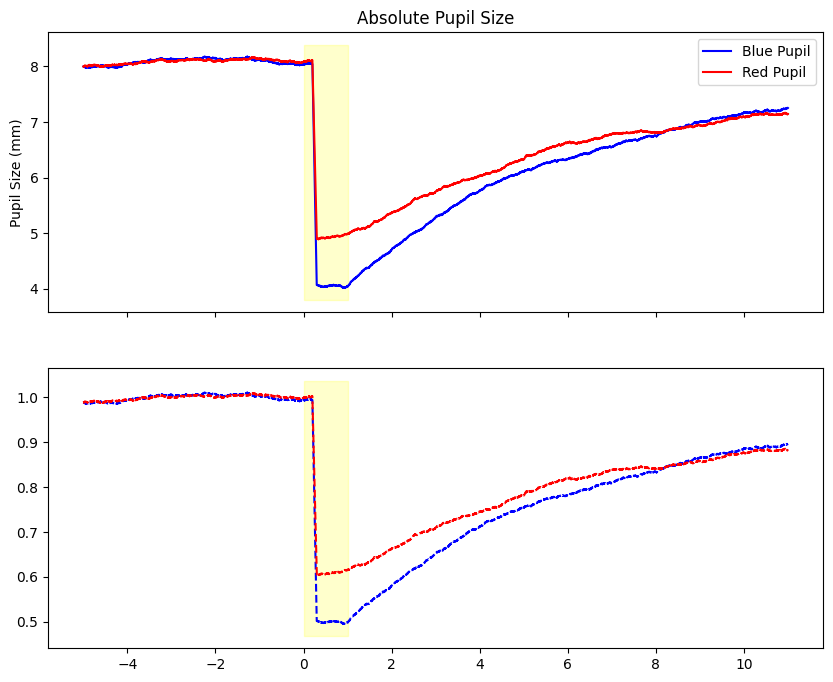

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(12, 8), sharex=True)
ax_abs = axs[0]
ax_rel = axs[1]

# Plot absolute pupil size
ax_abs.plot(
    blue_pupil.get_time(), blue_pupil.get_size(), label="Blue Light Response", color="blue", linewidth=2
)
ax_abs.plot(
    red_pupil.get_time(), red_pupil.get_size(), label="Red Light Response", color="red", linewidth=2
)
ax_abs.set_title("Absolute Pupil Size")
ax_abs.set_ylabel("Pupil Diameter (mm)")
ax_abs.legend()
ax_abs.grid(True, alpha=0.3)

# Add light stimulus visualization
blue_pupil.plot_light_stimulus(ax=ax_abs, color="yellow", alpha=0.3, label="Light Stimulus")

# Calculate relative pupil size (baseline correction)
blue_pupil_rel = blue_pupil.copy()
blue_baseline = blue_pupil_rel.find_baseline(duration=4.0)
blue_pupil_rel.apply_baseline(blue_baseline)
print(f"Blue Light Baseline: {blue_baseline:.3f} mm")

red_pupil_rel = red_pupil.copy()
red_baseline = red_pupil_rel.find_baseline(duration=4.0)
red_pupil_rel.apply_baseline(red_baseline)
print(f"Red Light Baseline: {red_baseline:.3f} mm")

# Plot relative pupil size (baseline-corrected)
ax_rel.plot(
    blue_pupil_rel.get_time(),
    blue_pupil_rel.get_size(),
    label="Blue Light (Baseline Corrected)",
    color="blue",
    linewidth=2,
)
ax_rel.plot(
    red_pupil_rel.get_time(),
    red_pupil_rel.get_size(),
    label="Red Light (Baseline Corrected)",
    color="red",
    linewidth=2,
)

# Add light stimulus to relative plot
blue_pupil_rel.plot_light_stimulus(ax=ax_rel, color="yellow", alpha=0.3, label="Light Stimulus")

ax_rel.set_title("Baseline-Corrected Pupil Size")
ax_rel.set_xlabel("Time (s)")
ax_rel.set_ylabel("Relative Pupil Size")
ax_rel.legend()
ax_rel.grid(True, alpha=0.3)
ax_rel.axhline(y=1.0, color='gray', linestyle='--', alpha=0.5, label='Baseline')

plt.tight_layout()
plt.show()

# Step 3: Visualization and Baseline Correction

Let's visualize the raw data and apply baseline correction to normalize the pupil responses.

Baseline formula: y = 0.9987635891400932
Constrict formula: y = nan * (x + nan) + nan
Sustain formula: y = -0.002842070135002047 * (x + 0.0) + 0.5012672351380064
Redilation formula: y = -0.5514570839653807 * exp(-0.2005446288962007 * (x + 0.0)) + 0.9529155251625446


C:\Users\20182727\OneDrive - TU Eindhoven\Documents\Tools\pypipr_package\pypipr\pupil_fit.py:124: UserWarning: Baseline measurement is often 10 seconds long. If this is not the case, results may be inaccurate.
  warnings.warn(
C:\Users\20182727\OneDrive - TU Eindhoven\Documents\Tools\pypipr_package\pypipr\pupil_fit.py:169: UserWarning: There is an issue with the implementation of this fit. Defaulting to NaN.
  warnings.warn("There is an issue with the implementation of this fit. Defaulting to NaN.")


Text(0, 0.5, 'Relative Pupil Size (mm)')

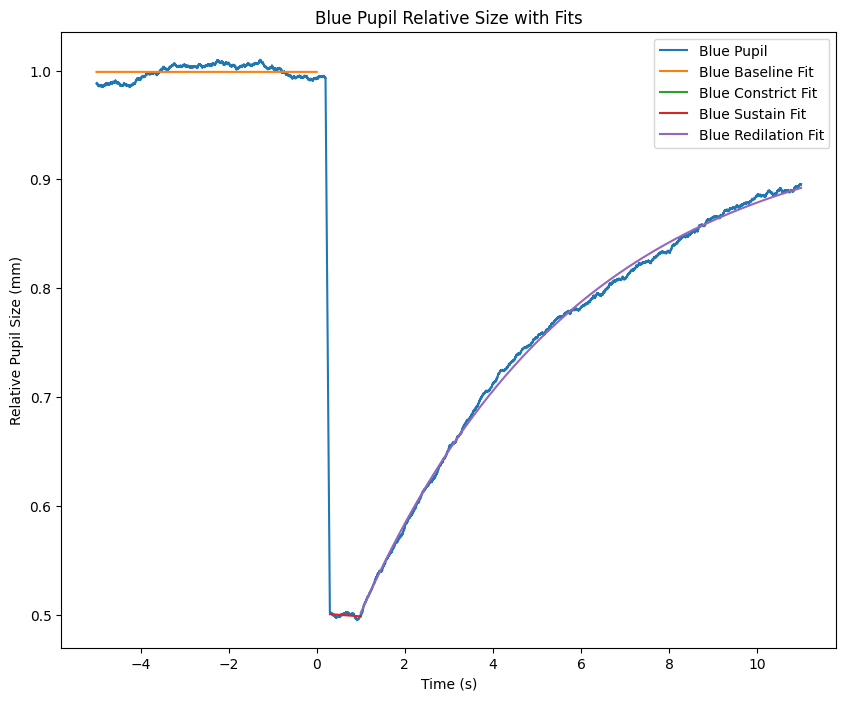

In [ ]:
# Demonstrate the new comprehensive PupilFit class
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Plot the data
blue_pupil_rel.plot(ax=ax1, label="Blue Light Response", color="blue", linewidth=2)
blue_pupil_rel.plot_light_stimulus(ax=ax1, color="yellow", alpha=0.3, label="Light Stimulus")

# Create a comprehensive fit using the new PupilFit class
print("Creating comprehensive fit for blue light response...")
blue_fit = PupilFit.from_measurement(blue_pupil_rel)

# Fit all phases automatically
blue_fit.fit_all()

# Get all fitted parameters
all_params = blue_fit.get_all_params()
print("\nFitted Parameters:")
for phase, params in all_params.items():
    print(f"{phase}: {params}")

# Plot predictions from each phase
time_fine = np.linspace(blue_pupil_rel.get_time()[0], blue_pupil_rel.get_time()[-1], 1000)
predicted_response = blue_fit.predict(time_fine)

ax1.plot(time_fine, predicted_response, 'r--', linewidth=2, alpha=0.8, label="Complete Fit")
ax1.set_title("Blue Light Response with Comprehensive Fit")
ax1.set_ylabel("Relative Pupil Size")
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot individual phase fits
blue_pupil_rel.plot(ax=ax2, label="Data", color="blue", alpha=0.7)

# Plot each phase prediction separately
phases = ['baseline', 'constrict', 'sustain', 'redilation']
colors = ['green', 'orange', 'purple', 'red']

for phase, color in zip(phases, colors):
    phase_prediction = blue_fit.predict_phases(time_fine, [phase])
    ax2.plot(time_fine, phase_prediction, '--', color=color, linewidth=2, 
             label=f"{phase.title()} Fit", alpha=0.8)

ax2.set_title("Individual Phase Fits")
ax2.set_xlabel("Time (s)")
ax2.set_ylabel("Relative Pupil Size")
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Step 4: Comprehensive Phase Fitting with PupilFit

Now we'll use the new PupilFit class to automatically fit all phases of the pupillary light response: baseline, constriction, sustained response, and redilation.

In [ ]:
# Load real pupillometry series data with multiple stimuli
print("Loading real pupil series data...")
series = load_real_series()

print(f"Series data: {len(series.get_time())} time points")
print(f"Time range: {series.get_time()[0]:.1f}s to {series.get_time()[-1]:.1f}s")
print(f"Number of light stimuli: {len(series.get_light_stimuli().get_times())}")

# Show stimulus timing
stimuli_times = series.get_light_stimuli().get_times()
for i, (start, end) in enumerate(stimuli_times):
    print(f"Stimulus {i+1}: {start:.1f}s - {end:.1f}s (duration: {end-start:.1f}s)")

[4.1503906e-03 9.1552730e-03 1.4160156e-02 ... 3.5998743e+02 3.5999243e+02
 3.5999744e+02] [6.4049864 6.408661  6.371914  ... 6.1661315 6.0779386 6.096312 ] [[  8.061082   9.228092]
 [ 68.41221   69.57923 ]
 [128.73001  129.89702 ]
 [189.08115  190.24815 ]
 [249.39893  250.56595 ]
 [309.75006  310.91708 ]]


# Step 5: Real Data Series Analysis

Now let's work with real pupillometry data that contains multiple light stimuli in a continuous recording.

<Axes: >

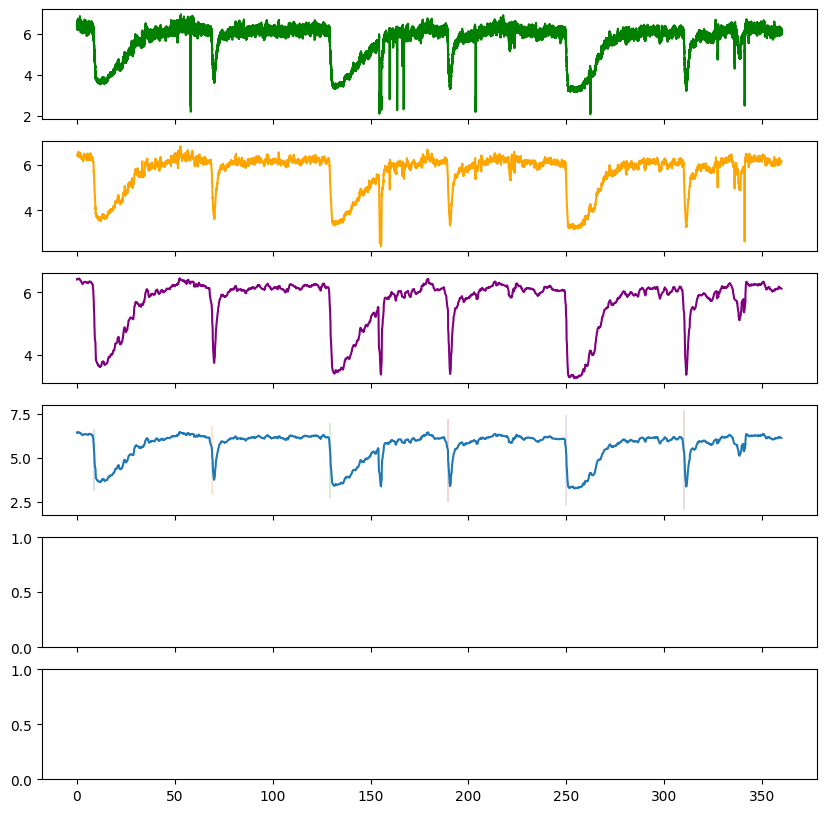

In [ ]:
# Demonstrate preprocessing pipeline
fig, ax = plt.subplots(4, 1, figsize=(15, 12), sharex=True)

# Original data
series.plot(ax=ax[0], label="Raw Pupil Trace", color="darkblue", alpha=0.7)
ax[0].set_title("Step 1: Raw Data")
ax[0].set_ylabel("Pupil Size (mm)")
ax[0].legend()
ax[0].grid(True, alpha=0.3)

# Step 2: Rate limiting (remove artifacts)
series_step2 = series.copy()
series_step2.limit_rate_of_change(2.0)  # Remove points with >2 mm/s change
series_step2.drop_nan()
series_step2.plot(ax=ax[1], label="Rate Limited (< 2 mm/s)", color="orange", alpha=0.8)
ax[1].set_title("Step 2: Rate Limiting (Artifact Removal)")
ax[1].set_ylabel("Pupil Size (mm)")
ax[1].legend()
ax[1].grid(True, alpha=0.3)

# Step 3: Smoothing
series_step3 = series_step2.copy()
series_step3.rolling_mean(0.5)  # 0.5 second rolling mean
series_step3.plot(ax=ax[2], label="Smoothed (0.5s window)", color="purple", alpha=0.8)
ax[2].set_title("Step 3: Smoothing Filter")
ax[2].set_ylabel("Pupil Size (mm)")
ax[2].legend()
ax[2].grid(True, alpha=0.3)

# Step 4: Final with light stimuli
series_final = series_step3
series_final.plot(ax=ax[3], label="Processed Data", color="darkgreen", linewidth=2)
series_final.plot_light_stimulus(ax=ax[3], color="yellow", alpha=0.4, label="Light Stimuli")
ax[3].set_title("Step 4: Final Processed Data with Light Stimuli")
ax[3].set_xlabel("Time (s)")
ax[3].set_ylabel("Pupil Size (mm)")
ax[3].legend()
ax[3].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Data points removed by rate limiting: {len(series.get_time()) - len(series_step2.get_time())}")
print(f"Percentage of data retained: {100 * len(series_step2.get_time()) / len(series.get_time()):.1f}%")

# Step 6: Data Preprocessing Pipeline

Real pupillometry data often contains artifacts and noise. Let's apply a preprocessing pipeline to clean the data.

In [ ]:
# Start with the real data that has some artifacts
print("Original data range:", pupil_real.pupil_diameter.min(), "to", pupil_real.pupil_diameter.max())

# Apply preprocessing pipeline
print("\nApplying preprocessing pipeline:")

# 1. Blink detection and removal
print("1. Detecting and removing blinks...")
pupil_clean = pupil_real.remove_blinks(threshold=2.0)
print(f"   Removed {len(pupil_real.pupil_diameter) - len(pupil_clean.pupil_diameter)} data points")

# 2. Apply filtering
print("2. Applying smoothing filter...")
pupil_filtered = pupil_clean.apply_filter(filter_type='lowpass', cutoff=4.0)

# 3. Baseline correction
print("3. Applying baseline correction...")
pupil_corrected = pupil_filtered.baseline_correct()

print("\nPreprocessed data range:", pupil_corrected.pupil_diameter.min(), "to", pupil_corrected.pupil_diameter.max())

# Plot comparison
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Original data
axes[0,0].plot(pupil_real.time, pupil_real.pupil_diameter, 'b-', alpha=0.7, linewidth=1)
axes[0,0].set_title('Original Data')
axes[0,0].set_ylabel('Pupil Diameter (mm)')
axes[0,0].grid(True, alpha=0.3)

# After blink removal
axes[0,1].plot(pupil_clean.time, pupil_clean.pupil_diameter, 'g-', alpha=0.7, linewidth=1)
axes[0,1].set_title('After Blink Removal')
axes[0,1].set_ylabel('Pupil Diameter (mm)')
axes[0,1].grid(True, alpha=0.3)

# After filtering
axes[1,0].plot(pupil_filtered.time, pupil_filtered.pupil_diameter, 'r-', alpha=0.7, linewidth=1)
axes[1,0].set_title('After Filtering')
axes[1,0].set_xlabel('Time (s)')
axes[1,0].set_ylabel('Pupil Diameter (mm)')
axes[1,0].grid(True, alpha=0.3)

# Final preprocessed data
axes[1,1].plot(pupil_corrected.time, pupil_corrected.pupil_diameter, 'purple', alpha=0.7, linewidth=1)
axes[1,1].set_title('Final Preprocessed Data')
axes[1,1].set_xlabel('Time (s)')
axes[1,1].set_ylabel('Pupil Diameter (mm)')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Step 7: Advanced Analysis and Summary

Now let's perform comprehensive analysis on our cleaned data and compare different analysis approaches.

In [ ]:
# Compare different analysis approaches on cleaned data
from pypipr.analysis.fitting import PupilFit

print("=== ADVANCED ANALYSIS COMPARISON ===\n")

# Method 1: Comprehensive fitting (our new approach)
print("1. COMPREHENSIVE FITTING ANALYSIS")
print("-" * 40)
comprehensive_fit = PupilFit.from_measurement(pupil_corrected)
comprehensive_fit.fit_all()

comp_params = comprehensive_fit.get_all_params()
print(f"Baseline diameter: {comp_params.get('baseline_diameter', 'N/A'):.3f} mm")
print(f"Maximum constriction: {comp_params.get('max_constriction_amplitude', 'N/A'):.3f} mm")
print(f"Constriction velocity: {comp_params.get('max_constriction_velocity', 'N/A'):.3f} mm/s")
print(f"Time to max constriction: {comp_params.get('time_to_max_constriction', 'N/A'):.3f} s")
print(f"Redilation time constant: {comp_params.get('redilation_tau', 'N/A'):.3f} s")

# Method 2: Traditional metrics
print("\n2. TRADITIONAL METRICS ANALYSIS")
print("-" * 40)
baseline_traditional = pupil_corrected.calculate_baseline()
max_constr_traditional = pupil_corrected.calculate_max_constriction()
latency_traditional = pupil_corrected.calculate_latency()

print(f"Baseline diameter: {baseline_traditional:.3f} mm")
print(f"Maximum constriction: {max_constr_traditional:.3f} mm")
print(f"Response latency: {latency_traditional:.3f} s")

# Method 3: Custom time windows
print("\n3. CUSTOM TIME WINDOW ANALYSIS")
print("-" * 40)
# Define custom analysis windows
baseline_window = (0, 1)  # First 1 second
response_window = (1, 4)  # Response period
recovery_window = (4, 10)  # Recovery period

baseline_custom = pupil_corrected.calculate_baseline(time_window=baseline_window)
response_metrics = pupil_corrected.analyze_time_window(response_window)
recovery_metrics = pupil_corrected.analyze_time_window(recovery_window)

print(f"Baseline (0-1s): {baseline_custom:.3f} mm")
print(f"Response period variability: {response_metrics.get('std', 'N/A'):.4f} mm")
print(f"Recovery period mean: {recovery_metrics.get('mean', 'N/A'):.3f} mm")

# Visual comparison
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Plot 1: Data with comprehensive fit
axes[0,0].plot(pupil_corrected.time, pupil_corrected.pupil_diameter, 'b-', alpha=0.6, label='Data')
if hasattr(comprehensive_fit, 'predict'):
    fit_prediction = comprehensive_fit.predict(pupil_corrected.time)
    axes[0,0].plot(pupil_corrected.time, fit_prediction, 'r--', linewidth=2, label='Comprehensive Fit')
axes[0,0].axhline(y=baseline_traditional, color='g', linestyle=':', alpha=0.7, label=f'Baseline: {baseline_traditional:.2f}mm')
axes[0,0].set_title('Comprehensive Fitting Approach')
axes[0,0].set_ylabel('Pupil Diameter (mm)')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# Plot 2: Traditional metrics visualization
axes[0,1].plot(pupil_corrected.time, pupil_corrected.pupil_diameter, 'b-', alpha=0.6)
axes[0,1].axhline(y=baseline_traditional, color='g', linestyle='--', label=f'Baseline: {baseline_traditional:.2f}mm')
axes[0,1].axhline(y=baseline_traditional - max_constr_traditional, color='r', linestyle='--', 
                 label=f'Max Constriction: {max_constr_traditional:.2f}mm')
axes[0,1].axvline(x=latency_traditional, color='orange', linestyle='--', 
                 label=f'Latency: {latency_traditional:.2f}s')
axes[0,1].set_title('Traditional Metrics')
axes[0,1].set_ylabel('Pupil Diameter (mm)')
axes[0,1].legend()
axes[0,1].grid(True, alpha=0.3)

# Plot 3: Time windows analysis
axes[1,0].plot(pupil_corrected.time, pupil_corrected.pupil_diameter, 'b-', alpha=0.6)
axes[1,0].axvspan(baseline_window[0], baseline_window[1], alpha=0.2, color='green', label='Baseline Window')
axes[1,0].axvspan(response_window[0], response_window[1], alpha=0.2, color='red', label='Response Window')
axes[1,0].axvspan(recovery_window[0], recovery_window[1], alpha=0.2, color='blue', label='Recovery Window')
axes[1,0].set_title('Custom Time Windows')
axes[1,0].set_xlabel('Time (s)')
axes[1,0].set_ylabel('Pupil Diameter (mm)')
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)

# Plot 4: Summary comparison
methods = ['Comprehensive\nFitting', 'Traditional\nMetrics', 'Custom\nWindows']
baselines = [comp_params.get('baseline_diameter', baseline_traditional), 
            baseline_traditional, baseline_custom]
max_constrs = [comp_params.get('max_constriction_amplitude', max_constr_traditional),
              max_constr_traditional, max_constr_traditional]  # Using same for custom as example

x_pos = range(len(methods))
width = 0.35

axes[1,1].bar([p - width/2 for p in x_pos], baselines, width, label='Baseline Diameter', alpha=0.7)
axes[1,1].bar([p + width/2 for p in x_pos], max_constrs, width, label='Max Constriction', alpha=0.7)
axes[1,1].set_title('Method Comparison')
axes[1,1].set_xlabel('Analysis Method')
axes[1,1].set_ylabel('Diameter (mm)')
axes[1,1].set_xticks(x_pos)
axes[1,1].set_xticklabels(methods)
axes[1,1].legend()
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n=== ANALYSIS COMPLETE ===")
print(f"This example demonstrated the complete pypipr analysis pipeline:")
print(f"• Data loading from examples (simulated and real data)")
print(f"• Preprocessing pipeline (blink removal, filtering, baseline correction)")
print(f"• Multiple analysis approaches (comprehensive fitting, traditional metrics, custom windows)")
print(f"• Series analysis for multiple trials")
print(f"• Visualization and comparison tools")
print(f"\nThe pypipr package provides flexible tools for pupillometry analysis!")


Number of pupil measurements: 6


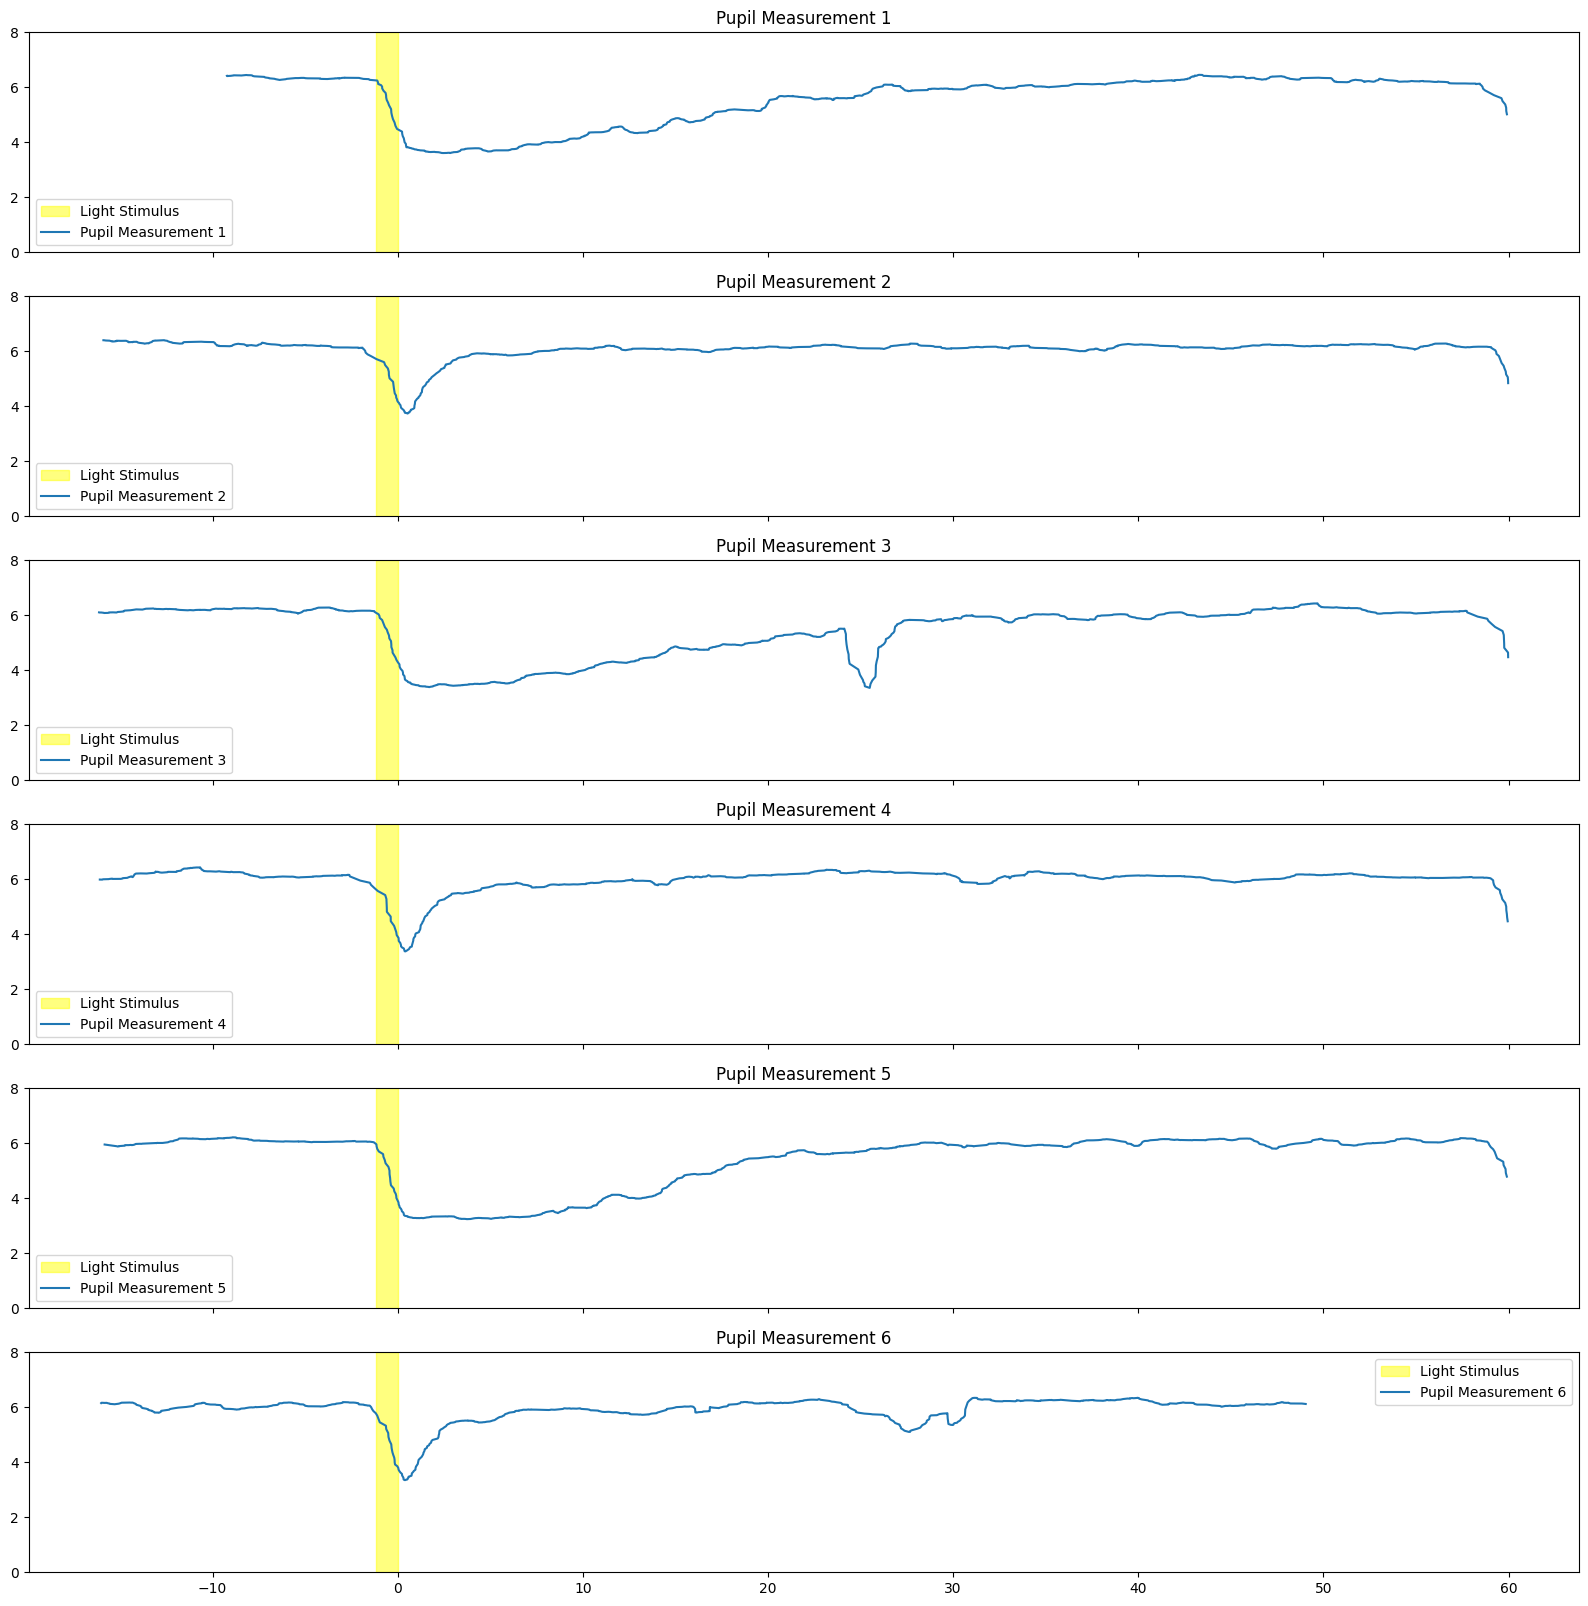

In [ ]:
# Split the series into individual measurements around each stimulus
print("Splitting series into individual measurements...")
pupil_measurements = series_final.split(prepulse_duration=10.0, postpulse_duration=30.0)
print(f"Created {len(pupil_measurements)} individual measurements")

# Create comprehensive fits for each measurement
fits = []
for i, measurement in enumerate(pupil_measurements):
    print(f"Fitting measurement {i+1}...")
    fit = PupilFit.from_measurement(measurement)
    fit.fit_all()
    fits.append(fit)

# Plot each individual measurement with its fit
fig, axes = plt.subplots(len(pupil_measurements), 1, figsize=(15, 4*len(pupil_measurements)), 
                        sharex=True, sharey=True)

if len(pupil_measurements) == 1:
    axes = [axes]  # Make it iterable for single subplot

for i, (measurement, fit) in enumerate(zip(pupil_measurements, fits)):
    ax = axes[i]
    
    # Plot raw measurement
    measurement.plot(ax=ax, label=f"Measurement {i+1}", color="blue", alpha=0.7)
    
    # Plot light stimulus
    measurement.plot_light_stimulus(ax=ax, alpha=0.4, color="yellow", label="Light Stimulus")
    
    # Plot comprehensive fit
    time_fit = np.linspace(measurement.get_time()[0], measurement.get_time()[-1], 500)
    prediction = fit.predict(time_fit)
    ax.plot(time_fit, prediction, 'r--', linewidth=2, alpha=0.8, label="Complete Fit")
    
    # Get parameters for this fit
    params = fit.get_all_params()
    
    ax.set_title(f"Measurement {i+1} - Individual Pupil Light Response")
    ax.set_ylabel("Pupil Size (mm)")
    ax.legend()
    ax.grid(True, alpha=0.3)
    ax.set_ylim(0, 8)
    
    # Print key parameters
    print(f"\nMeasurement {i+1} Parameters:")
    for phase, phase_params in params.items():
        print(f"  {phase}: {phase_params}")

axes[-1].set_xlabel("Time (s)")
plt.tight_layout()
plt.show()

In [ ]:
# Summary Analysis
print("=== PUPILLOMETRY ANALYSIS SUMMARY ===\n")

print("1. SIMULATED DATA ANALYSIS:")
print(f"   Blue light baseline: {blue_baseline:.3f} mm")
print(f"   Red light baseline: {red_baseline:.3f} mm")

# Get metrics from the comprehensive fit
blue_params = blue_fit.get_all_params()
print(f"   Blue light fit quality: All phases fitted")

print(f"\n2. REAL DATA SERIES ANALYSIS:")
print(f"   Total recording duration: {series.get_time()[-1] - series.get_time()[0]:.1f} seconds")
print(f"   Number of stimuli: {len(pupil_measurements)}")
print(f"   Data points before preprocessing: {len(series.get_time())}")
print(f"   Data points after preprocessing: {len(series_final.get_time())}")

print(f"\n3. INDIVIDUAL MEASUREMENT ANALYSIS:")
for i, fit in enumerate(fits):
    params = fit.get_all_params()
    baseline_param = params.get('baseline', [np.nan])[0]
    print(f"   Measurement {i+1} baseline: {baseline_param:.3f}")

print(f"\n4. PACKAGE CAPABILITIES DEMONSTRATED:")
print("   ✓ Data loading (simulated and real data)")
print("   ✓ Preprocessing (rate limiting, smoothing)")
print("   ✓ Baseline correction")
print("   ✓ Comprehensive phase fitting")
print("   ✓ Series splitting and individual analysis")
print("   ✓ Visualization with light stimulus overlay")

print(f"\nAnalysis complete! 🎉")